In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* Passengerid : passenger data id
* survived: *target value*  0 = death , 1 = survive
* Pclass: ticket class, 1 = first class, 2 = second class, 3 = third class
* sex
* name
* Age:
* sibsp: #num of companies(siblings or spouse)
* parch: #num of companies(parent or children)
* ticket: #num of ticket
* fare
* cabin: #num of cabin
* embarked: intermediate settlement port, C = Cherbourg, Q = Queenstown, S = Southampton

In [18]:
print('\n ### train data info ###  \n')
print(titanic_df.info())


 ### train data info ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [17]:
#titanic_df.describe()
titanic_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.000000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


**Processing_NULL Columns**

In [22]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

# check if there is still null value existed in dataframe
print(titanic_df.isnull().sum())
print('\nnum of Null values ',titanic_df.isnull().sum().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

num of Null values  0


**Principle columns EDA**

In [26]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [28]:
# Extract object column type
titanic_df.dtypes[titanic_df.dtypes == 'object'].index.tolist()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [29]:
print(' Sex distribution :\n',titanic_df['Sex'].value_counts())
print('\n Cabin distribution :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked distribution :\n',titanic_df['Embarked'].value_counts())

 Sex distribution :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin distribution :
 N              687
G6               4
B96 B98          4
C23 C25 C27      4
E101             3
              ... 
A19              1
C104             1
B73              1
B80              1
B94              1
Name: Cabin, Length: 148, dtype: int64

 Embarked distribution :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


=> The cabin distribution is too large! 

In [31]:
# Extract only first letter of string(cabin name)
titanic_df['Cabin'].str[:1]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [35]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))
print('\n')

print(titanic_df['Cabin'].value_counts())

0    N
1    C
2    N
Name: Cabin, dtype: object


N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


In [39]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [41]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

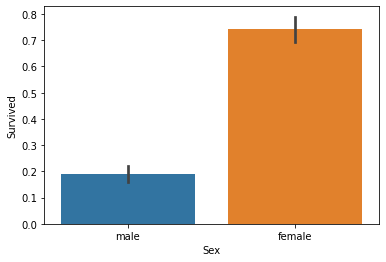

In [45]:
# visualization by seaborn
# since the values of survived consisted of 'death=0, survive=1', the average values appear like 0.0~0.8. 
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

=> we can notice that the survive ratio of female passengers is much greater than male passengers

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

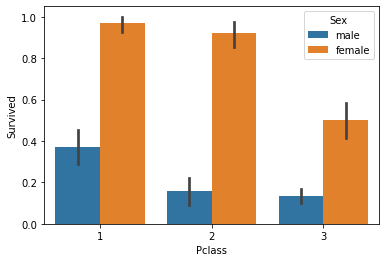

In [46]:
# visualization by seaborn
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

=> we can notice that the ticket class also affected to survive

In [49]:
titanic_df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

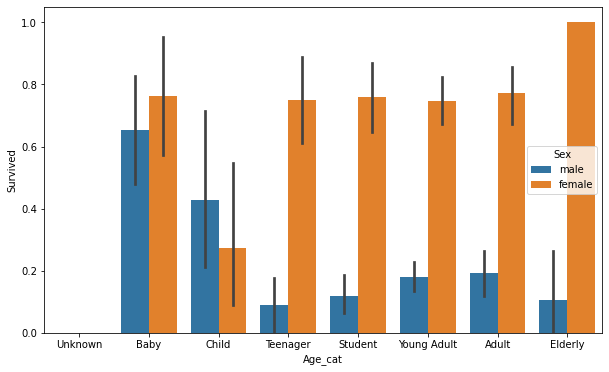

In [50]:
# set function for returning distuributed values according to input age. Use apply lambda of DataFrame
# x = Age 

def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
               
    return cat

# set bigger figure size for bar graph
plt.figure(figsize=(10,6))

# set to present x values consecutively 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# x = Age 
# set get_category() function by lambda for returning value
# get_category(X) is input, so it returns cat value according to 'Age' columns value by input
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [51]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    le = LabelEncoder()
    for feature in features:
        le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [53]:
from sklearn.preprocessing import LabelEncoder

# functions for processing Null
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    return df

# drop unnecessary features for machine learning algorithms 
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

# perform label encoding
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# call Data Preprocessing function : NULL value processing, drop unnecessary feature columns, encoding
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [54]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


### ! reload original data !

In [56]:
# extract feature datasets and Label datasets
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1, inplace=False)

X_titanic_df = transform_features(X_titanic_df)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 8) (179, 8) (712,) (179,)


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# create class 'Classifier' for DecisionTree, Random Forest, LogisticRegression.
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier's training/predict/accuracy
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier accuracy: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier's training/predict/accuracy
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier accuracy:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression's training/predict/accuracy
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression accuracy: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier accuracy: 0.7877
RandomForestClassifier accuracy:0.8547
LogisticRegression accuracy: 0.8659


In [59]:
X_titanic_df.values[[0, 1, 2, 3, 4, 5]]

array([[ 3.        ,  1.        , 22.        ,  1.        ,  0.        ,
         7.25      ,  7.        ,  3.        ],
       [ 1.        ,  0.        , 38.        ,  1.        ,  0.        ,
        71.2833    ,  2.        ,  0.        ],
       [ 3.        ,  0.        , 26.        ,  0.        ,  0.        ,
         7.925     ,  7.        ,  3.        ],
       [ 1.        ,  0.        , 35.        ,  1.        ,  0.        ,
        53.1       ,  2.        ,  3.        ],
       [ 3.        ,  1.        , 35.        ,  0.        ,  0.        ,
         8.05      ,  7.        ,  3.        ],
       [ 3.        ,  1.        , 29.69911765,  0.        ,  0.        ,
         8.4583    ,  7.        ,  2.        ]])

In [66]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # create KFold object, which is k=5, and create list object according to num of k.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # Perform cross validation of KFold.
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        
        # create index for indicating training data and test data fromX_titanic_df.
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier's training/predict/accuracy
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("cross validation {0} accuracy: {1:.4f}".format(iter_count, accuracy))     
    
    # calculate mean of accuracy from 5-fold. 
    mean_score = np.mean(scores)
    print("mean of accuracy: {0:.4f}".format(mean_score)) 

# call exec_kfold
exec_kfold(dt_clf , folds=5) 


cross validation 0 accuracy: 0.7542
cross validation 1 accuracy: 0.7809
cross validation 2 accuracy: 0.7865
cross validation 3 accuracy: 0.7697
cross validation 4 accuracy: 0.8202
mean of accuracy: 0.7823


In [67]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("cross validation {0} accuracy: {1:.4f}".format(iter_count, accuracy))

print("mean of accuracy: {0:.4f}".format(np.mean(scores)))

cross validation 0 accuracy: 0.7430
cross validation 1 accuracy: 0.7753
cross validation 2 accuracy: 0.7921
cross validation 3 accuracy: 0.7865
cross validation 4 accuracy: 0.8427
mean of accuracy: 0.7879


In [71]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV optimized hyperparameter :', grid_dclf.best_params_)
print('GridSearchCV max accuracy: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# predict with Estimator which is trained by optimized hyperparameter from GridSearchCV.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('DecisionTreeClassifier accuracy from test dataset : {0:.4f}'.format(accuracy))


GridSearchCV optimized hyperparameter : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV max accuracy: 0.7992
DecisionTreeClassifier accuracy from test dataset : 0.8715
